In [2]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

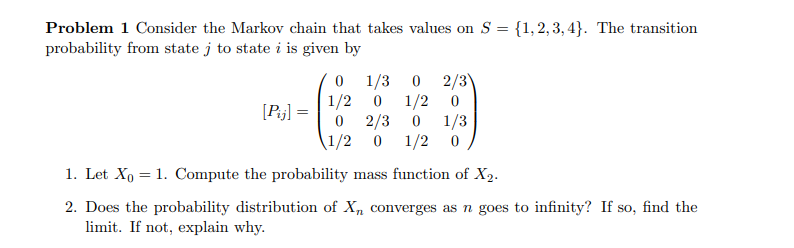

### Problem 1.1

In [3]:
# Given Transition Matrix
P = np.array([[0,1/2,0,1/2],[1/3,0,2/3,0],[0,1/2,0,1/2],[2/3,0,1/3,0]])

# Considering the current state to be state 1
x_0_1 = np.array([1,0,0,0])


x_2_1 = np.round(np.linalg.multi_dot([P,P,x_0_1]),3)

In [4]:
print(f"Probability of being in State 1 after 2 transitions:{x_2_1[0]}")
print(f"Probability of being in State 2 after 2 transitions:{x_2_1[1]}")
print(f"Probability of being in State 3 after 2 transitions:{x_2_1[2]}")
print(f"Probability of being in State 4 after 2 transitions:{x_2_1[3]}")

Probability of being in State 1 after 2 transitions:0.5
Probability of being in State 2 after 2 transitions:0.0
Probability of being in State 3 after 2 transitions:0.5
Probability of being in State 4 after 2 transitions:0.0


### Problem 1.2

- For any transition matrix to converge to a stationary distribution, follow the properties of being irreducible and being aperiodic.
- Property of Being Irreducible:
    - Since every state, have the same communicating classes i.e. $C(1) = C(2) = C(3) = C(4) = {(1,2,3,4)} $, the transition matrix is irreducible
- Property of Being Aperiodic:
    - The greatest common divisor of transtions required, when we start from $i_th$ state and end in $i_th$ state itself is the period of that particular state.
    - From the matrix when we calculate then the periods for each state turns out to be 2, and thus we have a **periodic transition matrix**
    - This fails the property of being Aperiodic, which requires each of the state to have a period of 1 at max.
    
- Observing these 2, in general we can conclude:
    - When a Markov Chain is periodic, and irreducible, the transitions will occur in cyclic manner and presence of cycles avoids it from reaching a stationary distribution, over time.
    - In summary, the chain will exibit a long term behaviour characterized by periodicity of cycles. Though the chain wouldn't stabilize it will exibit multiple distributions corresponding to different cycles. It might be also necessary to consider additional properties 

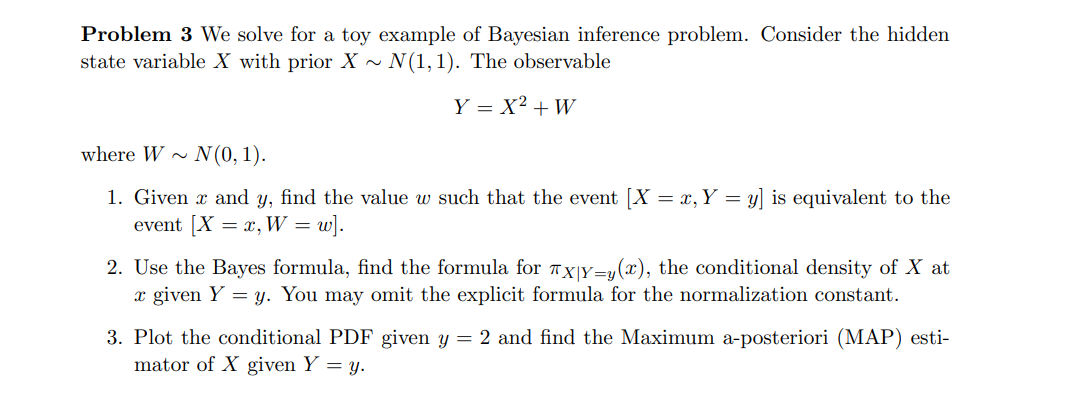

### Problem 3.1

- Given $X = x, Y = y$ To Find $w$ such that $P(X = x, Y = y) = P(X=x, W=w)$ 
- We can further expand the RHS of given equality as $P(X=x, Y=y) = P(X=x) . P(W=w)$ by property of independence
- By making use of equation $Y = X^2 + W$
- We have equation as $P(W = y - x^2) = P(X=x). P(W=w)$
- Substituting P(X=x) = 1, (since X=x event has happened) 
- We get $P(W = y - x^2) = P(W=w)$ this implies $w = y-x^2$.

### Problem 3.2

##### We need to find the value for $\pi_{X|Y=y}(x) = \frac{\pi_{Y|X=x}(y) * \pi_{X}(x)}{\pi_{Y}(y)}$
##### Consider the denominator: $\pi_{Y}(y) = X^2 + W $ as the normalization constant.
##### We have $\pi_{X|Y=y}(x)$ is proportional to $\pi_{Y|X=x}(y)*\pi_{X}(x)$
##### And $Y|X=x$ follows N(X^2,1), and $X$ follows N(1,1) 
##### Thus we have $\pi_{X|Y=y}(x)$ proportional to $\frac{e^{\frac{-(y-x^2)^2}{2}} . e^{\frac{-(x-1)^2}{2}}}{(2\pi)}$
##### Simplifying a bit: $\pi_{X|Y=y}(x)$ proportional to $\frac{e^{\frac{(y-x^2)^2+(x-1)^2}{-2}}}{2\pi}$

In [5]:
def posterior_density(x,y):
    return (1/(np.pi))*np.exp(-(1/2)*((y-x**2)**2+(x-1)**2))

### Problem 3.3

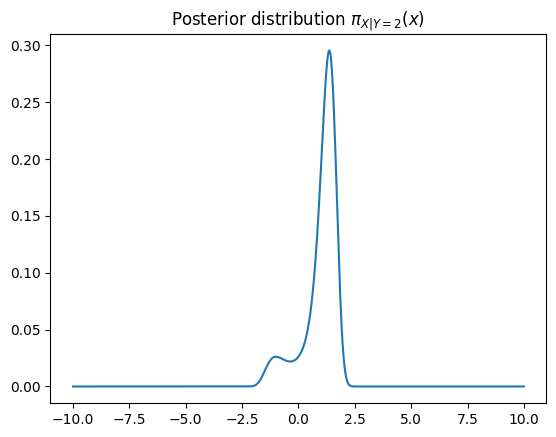

In [6]:
x=np.linspace(-10,10,1000)
y=2
z=posterior_density(x,y)
plt.plot(x,z)
plt.title("Posterior distribution $\pi_{X|Y=2}(x)$");

In [7]:
MAP=-10+np.argmax(z)*0.02
print("Maximum a posteriori estimator: ", MAP)

Maximum a posteriori estimator:  1.3599999999999994
